# Statistics 101 - Exercise

In [187]:
library(dplyr)
library(car)
library(Hmisc)
#install.packages("MESS")
library(MESS)

## change the size of the graphs
options(repr.plot.width = 3, repr.plot.height = 3)

In [100]:
## Data
fuel <- read.csv(file="car_fuel_comsumption.csv")
head(fuel)

car,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill.liters
1,28.0,5.0,26,21.5,12,,E10,0,0,0,45
2,12.0,4.2,30,21.5,13,,E10,0,0,0,NA
3,11.2,5.5,38,21.5,15,,E10,0,0,0,NA
4,12.9,3.9,36,21.5,14,,E10,0,0,0,NA
5,18.5,4.5,46,21.5,15,,E10,0,0,0,NA
6,8.3,6.4,50,21.5,10,,E10,0,0,0,NA


## Summary variables

In [123]:
### get out outliers
summary(fuel)

    distance        consume          speed        temp_inside   
 Min.   : 2.00   Min.   :3.300   Min.   :16.00   Min.   :19.00  
 1st Qu.:11.80   1st Qu.:4.300   1st Qu.:33.00   1st Qu.:21.50  
 Median :14.30   Median :4.700   Median :40.00   Median :22.00  
 Mean   :16.38   Mean   :4.779   Mean   :41.01   Mean   :21.93  
 3rd Qu.:18.40   3rd Qu.:5.200   3rd Qu.:49.00   3rd Qu.:22.50  
 Max.   :48.60   Max.   :6.900   Max.   :80.00   Max.   :25.50  
                                                 NA's   :12     
  temp_outside      specials   gas_type   AC      rain    sun    
 Min.   :-5.00          :275   E10 :145   0:335   0:318   0:331  
 1st Qu.: 7.00   rain   : 30   SP98:216   1: 26   1: 43   1: 30  
 Median :10.00   sun    : 26                                     
 Mean   :11.41   AC rain:  8                                     
 3rd Qu.:16.00   ac     :  7                                     
 Max.   :31.00   AC     :  6                                     
                 (

Some variables are categorical (like AC, rain, sun) but are represented as numerical. We convert them to factors

In [103]:
fuel$car <- NULL
fuel$AC <- factor(fuel$AC)
fuel$rain <- factor(fuel$rain)
fuel$sun <- factor(fuel$sun)
summary(fuel)

    distance        consume          speed        temp_inside   
 Min.   : 2.00   Min.   :3.300   Min.   :16.00   Min.   :19.00  
 1st Qu.:11.80   1st Qu.:4.300   1st Qu.:33.00   1st Qu.:21.50  
 Median :14.30   Median :4.700   Median :40.00   Median :22.00  
 Mean   :16.38   Mean   :4.779   Mean   :41.01   Mean   :21.93  
 3rd Qu.:18.40   3rd Qu.:5.200   3rd Qu.:49.00   3rd Qu.:22.50  
 Max.   :48.60   Max.   :6.900   Max.   :80.00   Max.   :25.50  
                                                 NA's   :12     
  temp_outside      specials   gas_type   AC      rain    sun    
 Min.   :-5.00          :275   E10 :145   0:335   0:318   0:331  
 1st Qu.: 7.00   rain   : 30   SP98:216   1: 26   1: 43   1: 30  
 Median :10.00   sun    : 26                                     
 Mean   :11.41   AC rain:  8                                     
 3rd Qu.:16.00   ac     :  7                                     
 Max.   :31.00   AC     :  6                                     
                 (

## Relationship analysis
 
Lets plot the variables an check their relationships:

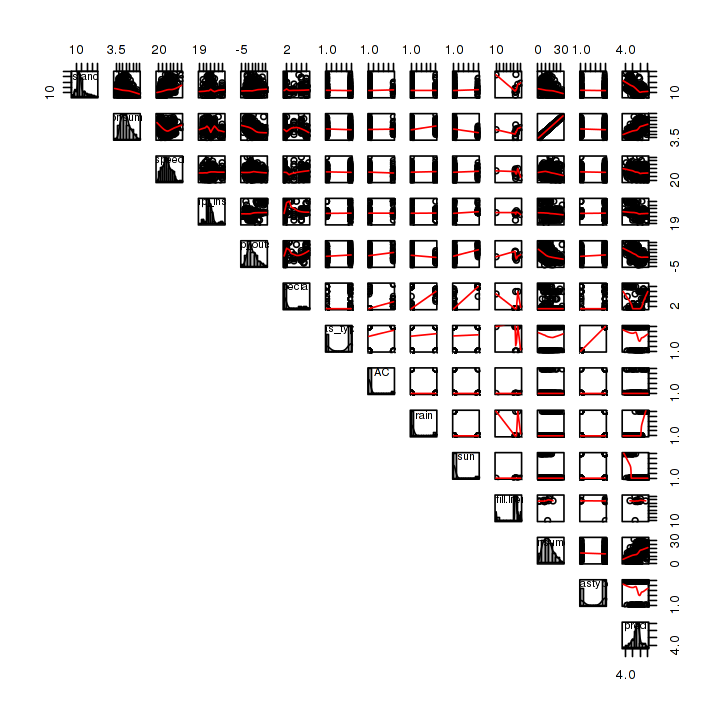

In [189]:
### a better representation of pairs
options(repr.plot.width = 6, repr.plot.height = 6)

pairs(fuel, 
      upper.panel = panel.smooth,
      diag.panel = panel.hist, 
      lower.panel = NULL,
      cex=0.8)


Now we will check for interactions between the dependent variable and the rest of the variables:

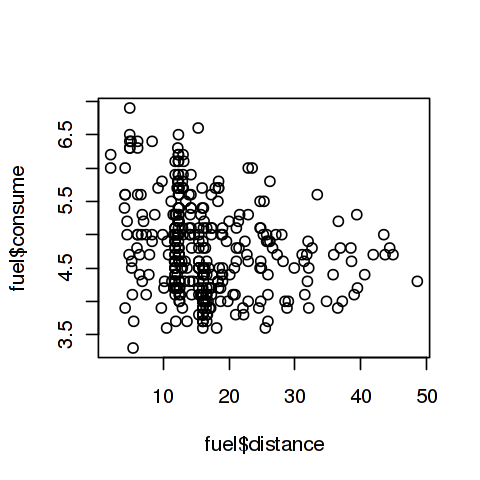

In [157]:
options(repr.plot.width = 4, repr.plot.height = 4)
## consume vs distance
plot(fuel$consume ~ fuel$distance)


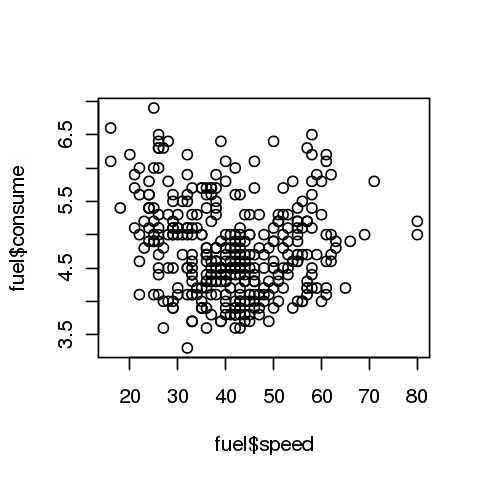

In [158]:
## consume vs speed
plot()

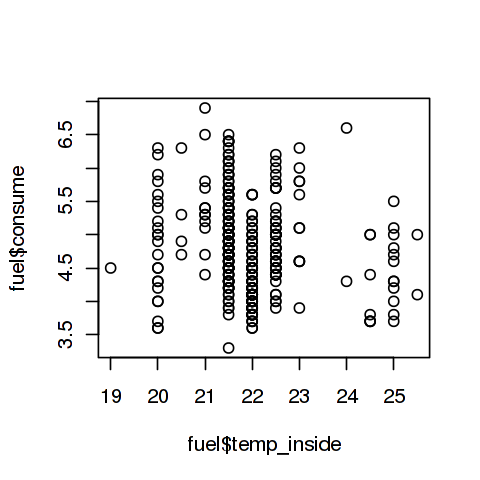

In [159]:
## consume vs temperature inside
plot()

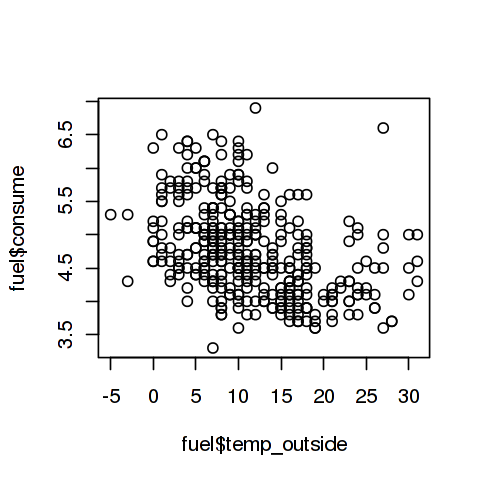

In [160]:
## consume vs temperature outside
plot()

Now we plot the categorical variables:

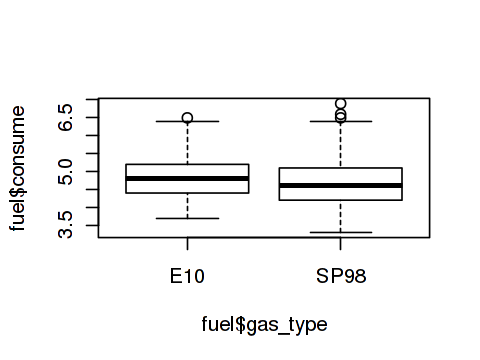

In [73]:
## consume vs gas type
plot(fuel$consume ~ fuel$gas_type)

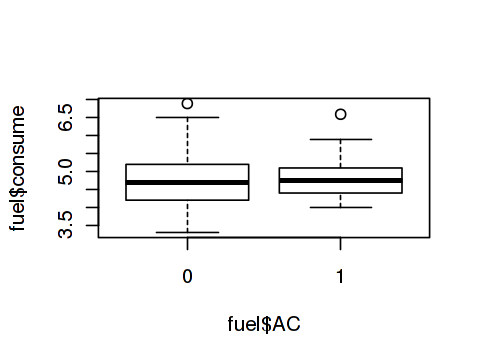

In [74]:
## consume vs air conditioning
plot()

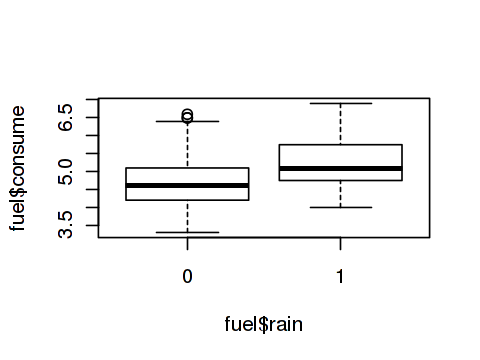

In [75]:
## consume vs rain
plot()

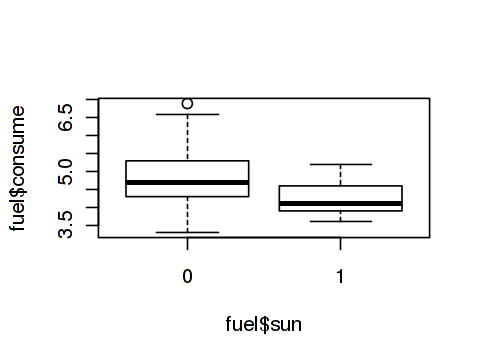

In [76]:
## consume vs sun
plot()

Now lets check the correlations between the numeric variables. We will use a correlation matrix from the Hmisc package.

In [134]:
vars <- c("consume","distance","speed","temp_inside")
res1 <- rcorr(as.matrix(fuel[,vars]), type="pearson")
res1


            consume distance speed temp_inside
consume        1.00    -0.24 -0.12       -0.16
distance      -0.24     1.00  0.35        0.01
speed         -0.12     0.35  1.00        0.01
temp_inside   -0.16     0.01  0.01        1.00

n
            consume distance speed temp_inside
consume         361      361   361         349
distance        361      361   361         349
speed           361      361   361         349
temp_inside     349      349   349         349

P
            consume distance speed  temp_inside
consume             0.0000   0.0181 0.0026     
distance    0.0000           0.0000 0.8862     
speed       0.0181  0.0000          0.7881     
temp_inside 0.0026  0.8862   0.7881            

In [122]:
## gas_type is a character variable and thus can not be entered as is. 
## We create a copy of the variable and convert it to numeric (1/2)
fuel$gastype <- as.numeric(fuel$gas_type)
vars <- c("consume","gastype","AC","rain","sun")

res2 <- rcorr(as.matrix(fuel[,vars]),type="spearman")
res2


        consume gastype   AC  rain   sun
consume    1.00   -0.07 0.02  0.24 -0.23
gastype   -0.07    1.00 0.12  0.06  0.02
AC         0.02    0.12 1.00  0.20  0.07
rain       0.24    0.06 0.20  1.00 -0.11
sun       -0.23    0.02 0.07 -0.11  1.00

n= 361 


P
        consume gastype AC     rain   sun   
consume         0.1599  0.6752 0.0000 0.0000
gastype 0.1599          0.0238 0.2795 0.6840
AC      0.6752  0.0238         0.0002 0.1759
rain    0.0000  0.2795  0.0002        0.0355
sun     0.0000  0.6840  0.1759 0.0355       

## Difference analysis
 
We will check if there are differences on our dependent variable (consume) among the different categorical variables  


	Two Sample t-test

data:  fuel$consume by fuel$gas_type
t = 1.0909, df = 359, p-value = 0.2761
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.06488402  0.22653791
sample estimates:
 mean in group E10 mean in group SP98 
          4.827586           4.746759 


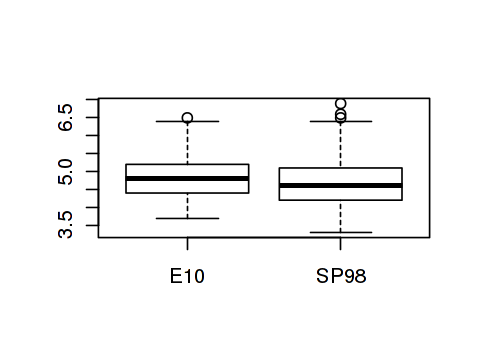

In [130]:
## Consume vs gas type:
boxplot(fuel$consume ~ fuel$gas_type)
t.test(fuel$consume ~ fuel$gas_type,var.equal = T,paired = F)


	Two Sample t-test

data:  fuel$consume by fuel$AC
t = -0.42424, df = 359, p-value = 0.6716
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3363866  0.2170066
sample estimates:
mean in group 0 mean in group 1 
       4.774925        4.834615 


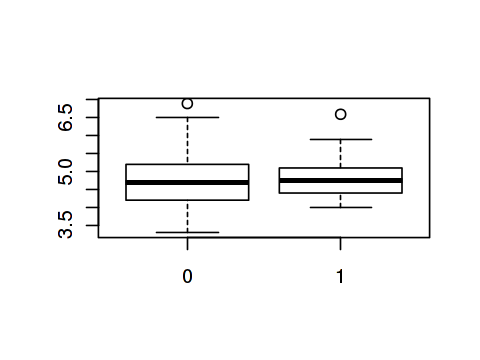

In [131]:
## Consume vs air conditioning:
boxplot()
t.test()


	Two Sample t-test

data:  fuel$consume by fuel$rain
t = -4.8768, df = 359, p-value = 1.623e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7443906 -0.3165571
sample estimates:
mean in group 0 mean in group 1 
       4.716038        5.246512 


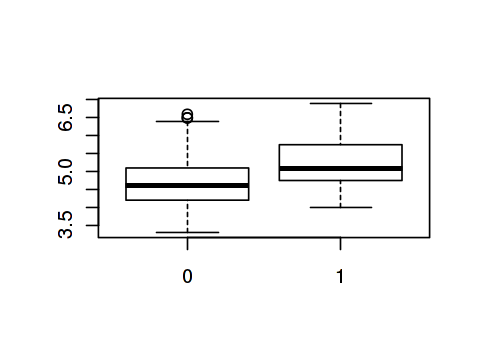

In [132]:
## Consume vs rain:
boxplot()
t.test()


	Two Sample t-test

data:  fuel$consume by fuel$sun
t = 4.2624, df = 359, p-value = 2.588e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2952195 0.8009940
sample estimates:
mean in group 0 mean in group 1 
       4.824773        4.276667 


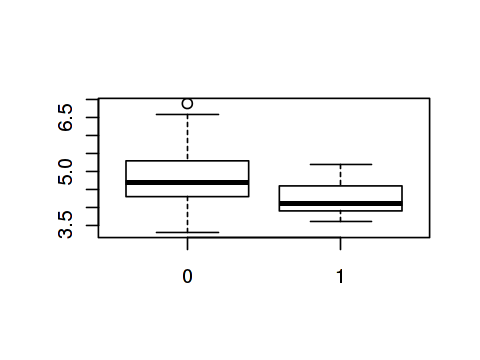

In [133]:
## Consume vs sun:
boxplot()
t.test()

## Linear Model

In [150]:
vars <-c("consume","distance","speed","temp_inside","gas_type","AC","rain","sun")
mod <- lm(consume ~. ,data=fuel[,vars])
summary(mod)


Call:
lm(formula = consume ~ ., data = fuel[, vars])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.67251 -0.45976 -0.04539  0.40226  1.87488 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.059179   0.801517   8.807  < 2e-16 ***
distance     -0.018399   0.004407  -4.175 3.79e-05 ***
speed        -0.003682   0.003159  -1.166  0.24455    
temp_inside  -0.080806   0.036333  -2.224  0.02680 *  
gas_typeSP98 -0.132171   0.069667  -1.897  0.05865 .  
AC1           0.077867   0.140444   0.554  0.57965    
rain1         0.490098   0.107486   4.560 7.15e-06 ***
sun1         -0.385691   0.127595  -3.023  0.00269 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.632 on 341 degrees of freedom
  (12 observations deleted due to missingness)
Multiple R-squared:  0.178,	Adjusted R-squared:  0.1611 
F-statistic: 10.55 on 7 and 341 DF,  p-value: 5.132e-12


In [188]:
vif(mod)

distance       speed temp_inside    gas_type          AC        rain 
   1.144729    1.151486    1.190920    1.023317    1.188165    1.068536 
        sun 
   1.083711

In [162]:
vars <-c("consume","distance","temp_inside","rain","sun")
mod2 <- lm(consume ~. ,data=fuel[,vars])
summary(mod2)


Call:
lm(formula = consume ~ ., data = fuel[, vars])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.71362 -0.47117  0.00148  0.43303  1.97211 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.754972   0.757536   8.917  < 2e-16 ***
distance    -0.019763   0.004132  -4.783 2.56e-06 ***
temp_inside -0.076029   0.034497  -2.204  0.02819 *  
rain1        0.485229   0.104934   4.624 5.33e-06 ***
sun1        -0.399479   0.127756  -3.127  0.00192 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6338 on 344 degrees of freedom
  (12 observations deleted due to missingness)
Multiple R-squared:  0.166,	Adjusted R-squared:  0.1563 
F-statistic: 17.12 on 4 and 344 DF,  p-value: 8.088e-13


To compare two models, we can use two different statistics: Akaike Information criterion (AIC) or the Bayesian Information criterion (BIC). Most of the time both are comparable. The best model is the one with the lower AIC or BIC.

In [163]:
c(AIC(mod), AIC(mod2))


[1] 680.0741 679.1142

In [164]:
c(BIC(mod), BIC(mod2))

[1] 714.7698 702.2446

The AIC and BIC indicate that the best model is the second, even that the R-square for the second model is lower than the one. 
 
We will now plot the data vs the prediction of the model

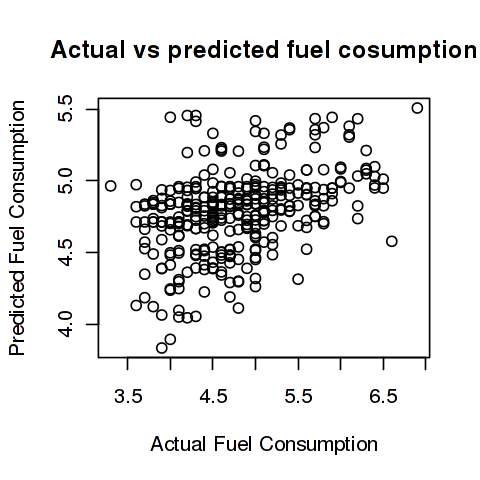

In [161]:
fuel$pred <- predict(mod2, newdata=fuel)

plot(fuel$pred ~ fuel$consume, main="Actual vs predicted fuel cosumption", 
     xlab="Actual Fuel Consumption", ylab="Predicted Fuel Consumption")

## Monte Carlo simulation
 
Lets say we want to calculate the effect of different distances on consumption of car 1. For this, we will use the linear model we created to calculate the consumption. We also will leave constant all the other variables in the data. We will run the Monte Carlo simulation 1000 times by sampling each time a different value form the distances of the whole dataset...

In [183]:
## set y to zero
y <- rep(0,1000)
d <- rep(0,1000)

# get the base variables for car 1
car1 <- fuel[1,c("temp_inside","rain","sun")]

# now we will run the simulation
for (i in 1:1000) {
  set.seed(i)
  distance <- sample(x=fuel$distance,size=1)
  x <- cbind(distance,car1)
  d[i] <- distance
  y[i] <- predict(mod2,newdata=x)
}

head(y)
summary(y)
paste("sd = ",sd(y))
summary(d)

[1] 5.015597 5.080816 4.875277 4.887135 4.630210 4.887135

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.160   4.757   4.838   4.801   4.887   5.081 

[1] "sd =  0.155090214088907"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   11.80   14.30   16.14   18.40   48.60 

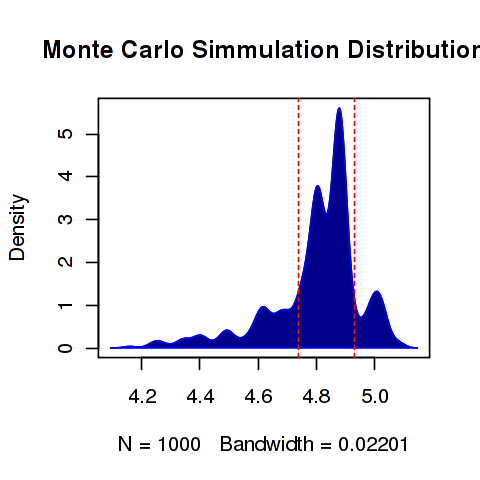

In [186]:
d <- density(y,na.rm = T)
plot(d, main="Monte Carlo Simmulation Distribution")
polygon(d, col="darkblue", border="blue")
abline(v=c(4.74,4.93), col="red",lty=2)


We can say that most of the time, the consumption of car number one will be between 4.74 and 4.93